In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
'CO2 Emissions_Canada.csv'
df=pd.read_csv('CO2 Emissions_Canada.csv')

In [3]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [5]:
#Get the shape of the dataset
df.shape

(7385, 12)

In [6]:
df.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [7]:
np.max(df[df.columns[-1]].values)

522

In [8]:
# The maximum co2 emission for a vehicle from the dataset is 522g/km
# Lets see how many cylinders this particular vehicle has
df['Engine Size(L)'].values[np.argmax(df[df.columns[-1]].values)]

8.0

### we can see from above that the car with 8 cylinders has the highest CO2 emission

In [9]:
#let do some more data cleaning
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [10]:
df.duplicated().sum()

1103

In [11]:
#Drop Duplicated data
df=df.drop_duplicates()
df.shape

(6282, 12)

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),6282.0,3.161812,1.365201,0.9,2.0,3.0,3.7,8.4
Cylinders,6282.0,5.618911,1.846250,3.0,4.0,6.0,6.0,16.0
Fuel Consumption City (L/100 km),6282.0,12.610220,3.553066,4.2,10.1,12.1,14.7,30.6
Fuel Consumption Hwy (L/100 km),6282.0,9.070583,2.278884,4.0,7.5,8.7,10.3,20.6
Fuel Consumption Comb (L/100 km),6282.0,11.017876,2.946876,4.1,8.9,10.6,12.7,26.1
Fuel Consumption Comb (mpg),6282.0,27.411016,7.245318,11.0,22.0,27.0,32.0,69.0
CO2 Emissions(g/km),6282.0,251.157752,59.290426,96.0,208.0,246.0,289.0,522.0


In [13]:
def explore_cat_feature(feature):
    group=df.groupby(feature).mean()
    plt.figure(figsize=[15,5])
    plots=group['CO2 Emissions(g/km)'].sort_values().plot(kind='bar',fontsize=15)
    plt.xlabel(feature,fontsize=15)
    plt.ylabel('Mean Co2 Emission',fontsize=15)
  

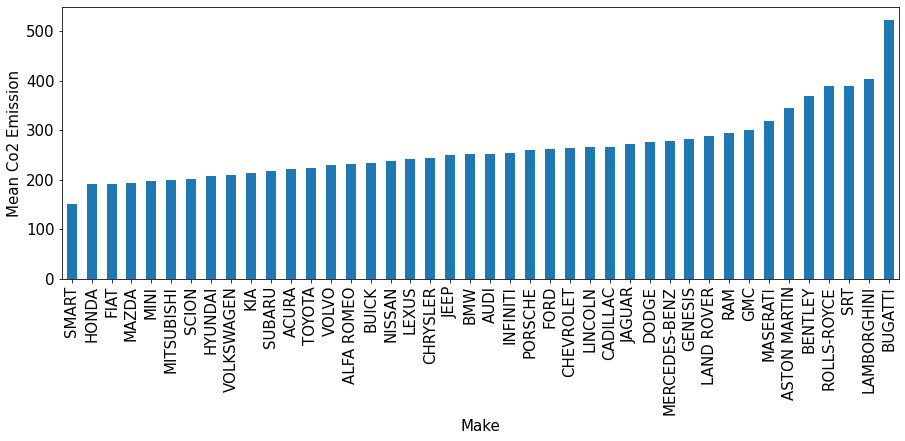

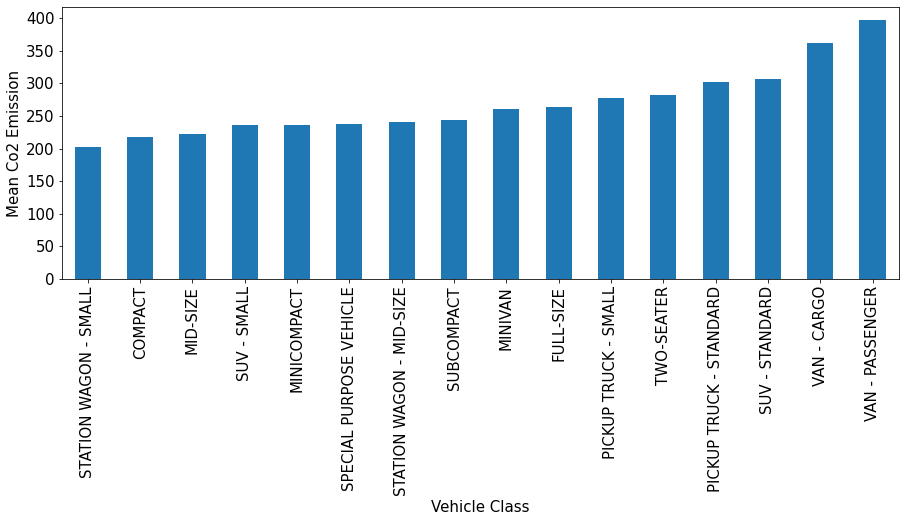

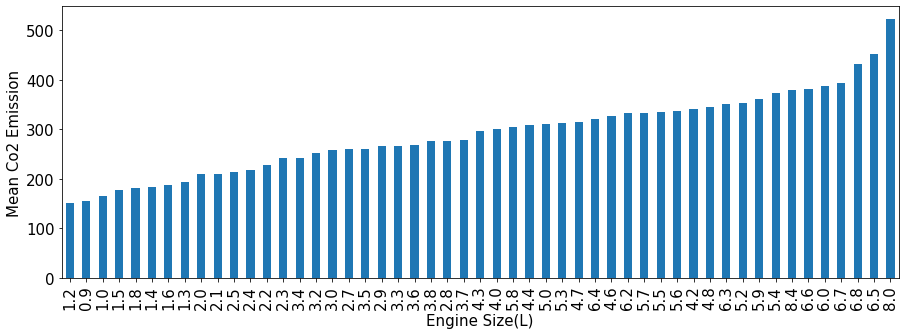

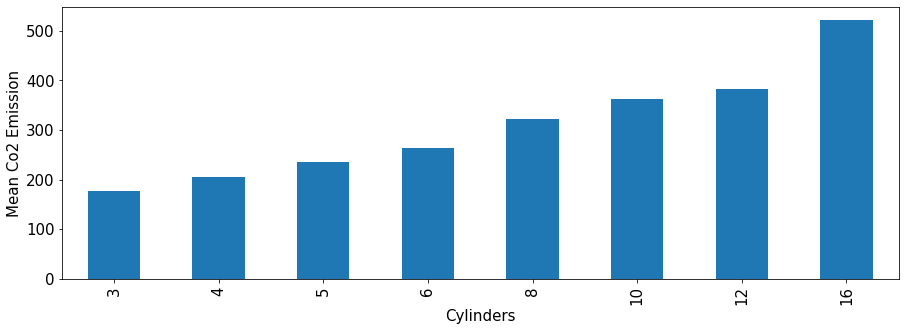

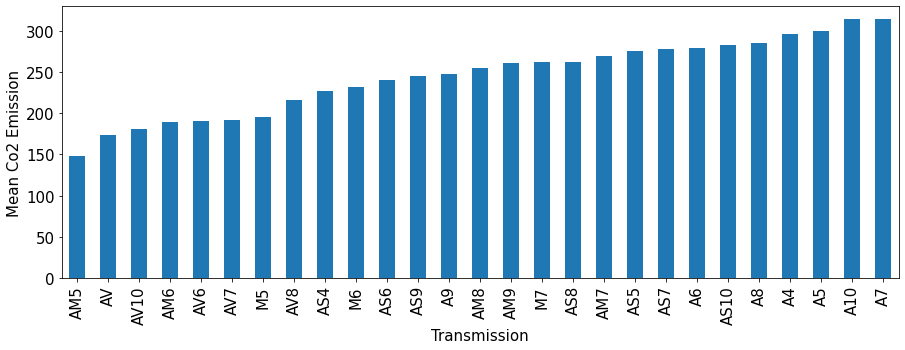

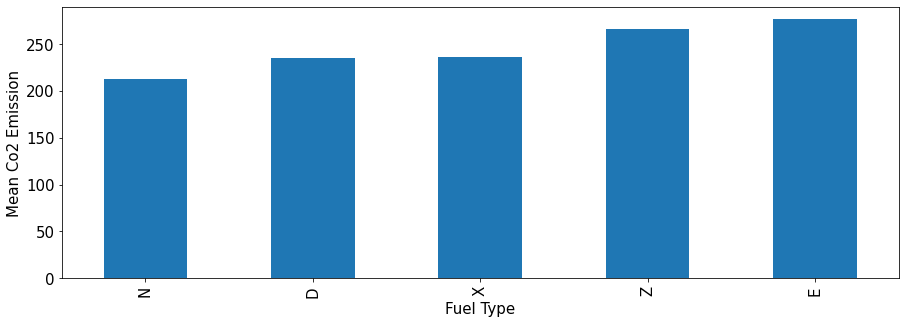

In [14]:
#Explore how all the features affect the CO2 emission
for feature in ['Make','Vehicle Class', 
                'Engine Size(L)','Cylinders','Transmission','Fuel Type']:
    explore_cat_feature(feature)

### vehicle class, Engine size and Cylinders have a clear effect on increasing Co2 Emission

In [15]:
df['Model'].value_counts()

F-150 FFV                           32
F-150 FFV 4X4                       31
MUSTANG                             27
FOCUS FFV                           24
F-150 4X4                           20
                                    ..
Escape Hybrid AWD                    1
CONTINENTAL GT SPEED CONVERTIBLE     1
Traverse                             1
Ghibli SQ4                           1
Challenger GT AWD                    1
Name: Model, Length: 2053, dtype: int64

In [16]:
def explore_num_feature(feature):
    plt.figure(figsize=[15,5])
    plt.scatter(df[feature],df['CO2 Emissions(g/km)'])
    plt.xlabel(feature,fontsize=15)
    plt.ylabel('Co2 Emission',fontsize=15)
    plt.title(" Co2 Emission vs. {}".format(feature),fontsize=20)

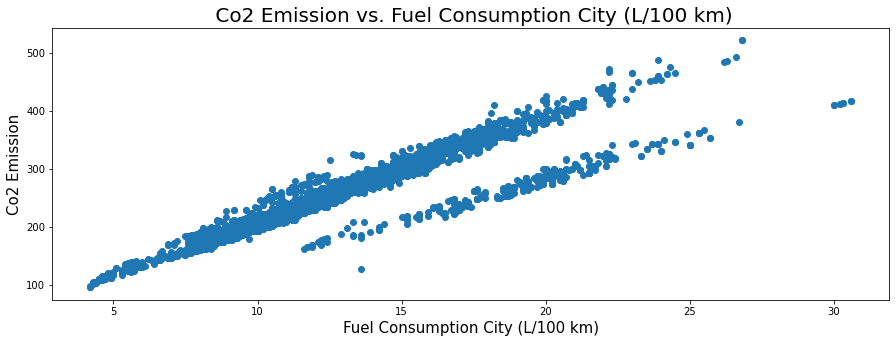

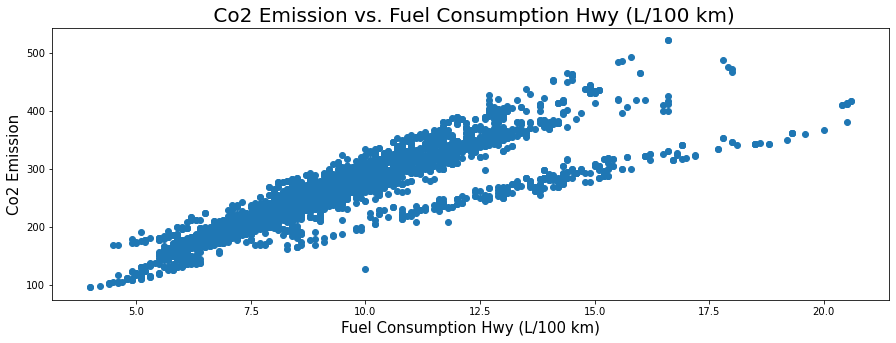

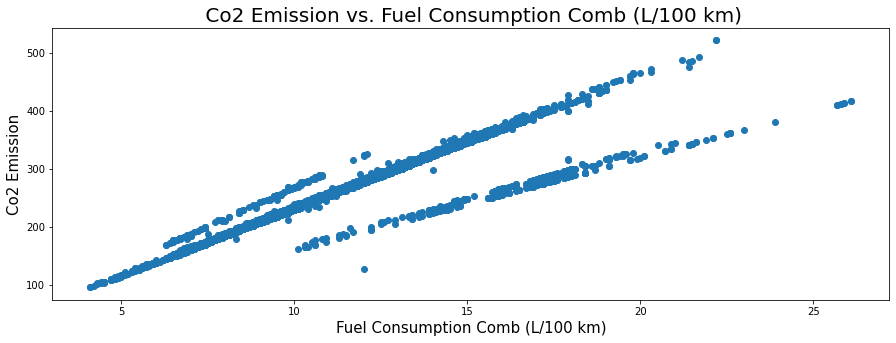

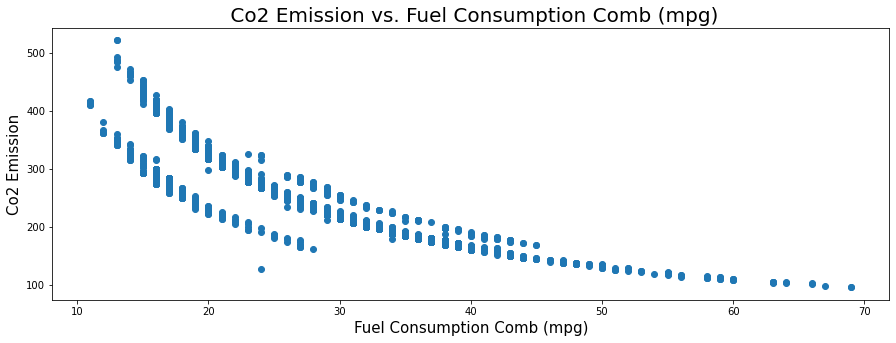

In [17]:
for feature in ['Fuel Consumption City (L/100 km)', 
                'Fuel Consumption Hwy (L/100 km)', 
                'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)']:
    explore_num_feature(feature)

## Modelling

In [18]:
# lets drop all the unnecessary parameters
df2 = df.drop(['Make','Model','Vehicle Class',
               'Fuel Consumption City (L/100 km)', 
               'Transmission', 'Fuel Type', 'Fuel Consumption Hwy (L/100 km)','Fuel Consumption Comb (mpg)'],axis=1)
df2.head()

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


In [19]:
x=df2.drop(['CO2 Emissions(g/km)'],axis=1)
y=df2["CO2 Emissions(g/km)"]

In [20]:
from sklearn.model_selection import train_test_split, cross_val_score,cross_val_predict
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

## Random Forest Regression

In [21]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(random_state=42)
rf.fit(X_train,y_train)
print('Training Accuracy: ',rf.score(X_train,y_train))
print('Testing Accuracy: ',rf.score(X_test,y_test))

Training Accuracy:  0.9898811794835988
Testing Accuracy:  0.9716591590111995


## we got a test accuracy of 96% using Random Forest Regression

In [22]:
from sklearn.model_selection import cross_val_score
print('RandomForest Cross Validation: ' , cross_val_score(rf, x, y, cv=5))

RandomForest Cross Validation:  [0.92073261 0.96717025 0.97814764 0.97788856 0.97907729]


## Saving the model

In [23]:
import pickle

#name of the model
filename='vehicle_carbon_emission_model.sav'
pickle.dump(rf,open(filename,'wb'))

## Load the model from disk and make predictions

In [24]:
filename='vehicle_carbon_emission_model.sav'
loaded_model=pickle.load(open(filename,'rb'))
# lets see how the data looks like
test_data=np.expand_dims(X_test.values[0],axis=0)
test_data

array([[ 3.,  6., 12.]])

In [25]:
#lets use the model to make prediction on the test data
prediction=loaded_model.predict(test_data)

In [26]:
#lets see our predictions
prediction

array([287.370415])

## the model predicted that this vehicle would give an emission of 283.73g/km